# Wstęp

Może się wydawać, że Polska jest szczególnym miejscem jeśli chodzi o zmianę klimatu. W sumie czasem pada śnieg albo jest zimno, czasem latem trzeba zakładać kurtkę, etc. Spójrzmy, co zmieniło się na przestrzeni lat.

Zbiór danych przetwarzany tutaj opisuje **temperaturę lądu**, nie temperaturę powietrza. Ląd ogrzewa się szybciej niż powietrze, więc łatwiej z niego wyłowić trendy.

Na początku analizy posiłkowałem się trochę [tym wpisem][1] [Tomasza Tomaszewskiego][2], ale w końcu zrozumiałem to i owo i dopisałem kilka rzeczy, a z kilku zrezygnowałem.

### Uwaga

Nie chciałem umieszczać w repozytorium całego zbioru danych, gdyż waży on około 500MB. W związku z tym ograniczyłem go tylko do Polski. Jeśli chcesz coś policzyć na danych z całego świata, cały zbiór możesz ściągnąć [na kaggle][3].

Zaczynamy.

Najpierw kilka ustawień początkowych i import potrzebnych bibliotek.

  [1]: https://medium.com/@tkwadrat/gor%C4%85cy-kwietniowy-weekend-czas-na-small-talk-w-oparciu-o-dane-c4d0c158c013
  [2]: https://twitter.com/tkwadrat
  [3]: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar, datetime

sns.set(style='whitegrid', palette='Set2')

CITY = 'Torun'
SELECTED_CITIES = ['Torun', 'Cracow', 'Katowice', 'Olsztyn', 'Szczecin', 'Bialystok',
                   'Zielona Gora', 'Warsaw', 'Poznan', 'Bialystok', 'Wroclaw']


START_YEAR = 1753
MONTH = int(datetime.datetime.now().strftime("%m"))
# when global average temperature started to rise
RISE_START_YEAR = 1970

# Baseline years
BASE_YEAR_START = 1850
BASE_YEAR_END = 1900

Teraz wczytujemy dane z udostępnionego zbioru i czyścimy je z niepotrzebnych w tej analizie informacji.

In [2]:
df = pd.read_csv('./data/climate/GlobalLandTemperaturesByCityPoland.csv')

date_index = pd.to_datetime(df['dt'], format='%Y-%m-%d', errors='ignore')

df['di'] = date_index
df['Year'] = df['di'].dt.year
df['Month'] = df['di'].dt.month
df['Day'] = df['di'].dt.day

poland = df
poland_clean = poland.copy()

poland_clean.drop('Latitude', axis=1, inplace=True)
poland_clean.drop('Longitude', axis=1, inplace=True)
poland_clean.drop('AverageTemperatureUncertainty', axis=1, inplace=True)
poland_clean.drop('Country', axis=1, inplace=True)
poland_clean.drop('dt', axis=1, inplace=True)

city = df[df['City'] == CITY].dropna().copy()
climate_city = city[city['Year'] >= START_YEAR].copy()
month_city = climate_city[climate_city['Month'] == MONTH].copy()
current_month_city = month_city[month_city['Year'] > RISE_START_YEAR]
baseline_month_city = month_city[
    month_city['Year'].between(BASE_YEAR_START, BASE_YEAR_END)].copy()

Do dyspozycji w Polsce miałem następujące miasta:

In [3]:
poland['City'].unique()

array(['Bialystok', 'Bielsko Biala', 'Bydgoszcz', 'Bytom', 'Chorzow',
       'Cracow', 'Czestochowa', 'Dabrowa Gornicza', 'Elblag', 'Gdansk',
       'Gdynia', 'Gliwice', 'Gorzow Wielkopolski', 'Kalisz', 'Katowice',
       'Kielce', 'Koszalin', 'Legnica', 'Lublin', 'Olsztyn', 'Opole',
       'Plock', 'Poznan', 'Radom', 'Ruda Slaska', 'Rybnik', 'Rzeszow',
       'Sosnowiec', 'Szczecin', 'Tarnow', 'Torun', 'Tychy', 'Walbrzych',
       'Warsaw', 'Wloclawek', 'Wroclaw', 'Zabrze', 'Zielona Gora'], dtype=object)

Wybierzmy kilka i zobaczmy, jak się zmieniała dla nich temperatura na przestrzeni lat.

To co widać na poniższym wykresie to znaczący wzrost średnich temperatur od początku XX wieku. Dane kończą się na roku 2013 i do tej chwili średnia temperatura wzrosła o 1 stopień.

Ciekawe jest to, że najchłodniejsze z miast (Białystok) ma średnią temperaturę niższą o ponad 2 stopnie od najcieplejszego (Zielonej Góry).

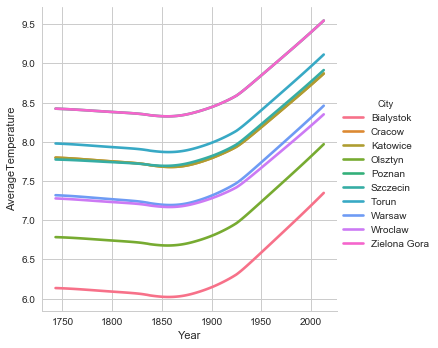

In [4]:
sns.lmplot(x='Year', y='AverageTemperature', hue='City', data=poland[poland['City'].isin(SELECTED_CITIES)], 
           scatter=False, lowess=True)

#Analiza dla Torunia

Sam mieszkam obecnie w Toruniu i dlatego analizę przeprowadzę dla tego właśnie miasta.

Część wykresów dotyczyć będzie obecnego miesiąca (tego, w którym uruchomię notebook albo w którym Ty go sforkujesz i uruchomisz ;) )

Próbka zbioru danych dla Torunia po usunięciu kolumn, które mnie nie interesowały, wygląda tak:

In [5]:
climate_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,di,Year,Month,Day
97280,1753-01-01,-5.024,7.544,Torun,Poland,52.24N,18.39E,1753-01-01,1753,1,1
97281,1753-02-01,-3.030,3.273,Torun,Poland,52.24N,18.39E,1753-02-01,1753,2,1
97282,1753-03-01,4.348,3.302,Torun,Poland,52.24N,18.39E,1753-03-01,1753,3,1
97283,1753-04-01,9.217,6.484,Torun,Poland,52.24N,18.39E,1753-04-01,1753,4,1
97284,1753-05-01,13.580,1.963,Torun,Poland,52.24N,18.39E,1753-05-01,1753,5,1


Od 1753 roku mamy pełne dane. Widać też, że są to średnie z całego miesiąca.

Na początek sprawdźmy jaka była średnia temperatura w aktualnym miesiącu od 1753 i 1970 roku. W 1970 uśredniona temperatura całego świata zaczęła dramatycznie rosnąć.

Należy wziąć pod uwagę, że naukowcy badający klimat odchylenia od średniej mierzą względem okresu **1850-1900** (o tym więcej poniżej).

In [6]:
print("Average temperature in {city} in {from_year}-2013: {temperature}".format(
    city=calendar.month_name[MONTH],
    from_year=START_YEAR,
    temperature=month_city['AverageTemperature'].mean()
))
print("Average temperature in {city} in {from_year}-2013: {temperature}".format(
    city=calendar.month_name[MONTH],
    from_year=RISE_START_YEAR,
    temperature=current_month_city['AverageTemperature'].mean()
))
print("Average temperature in {city} in {from_year}-{to_year}: {temperature} (baseline)".format(
    city=calendar.month_name[MONTH],
    from_year=BASE_YEAR_START,
    to_year=BASE_YEAR_END,
    temperature=baseline_month_city['AverageTemperature'].mean()
))

Average temperature in September in 1753-2013: 14.08733076923077
Average temperature in September in 1970-2013: 14.224523809523811
Average temperature in September in 1850-1900: 13.92435294117647 (baseline)


Poniższy wykres przedstawia rozkład temperatur w całym roku i w miesiącu zdefiniowanym w `MONTH`.

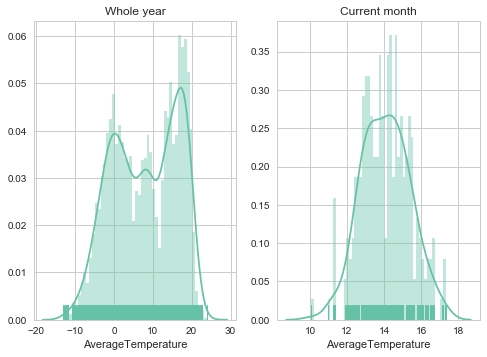

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(climate_city['AverageTemperature'], bins=50, rug=True, ax=ax1)
ax1.set_title("Whole year")
sns.distplot(month_city['AverageTemperature'], bins=50, rug=True, ax=ax2)
ax2.set_title("Current month")
plt.show()

Następny wykres przedstawia zmiany średniej temperatury na przestrzeni lat we wszystkich miesiącach. Dokładniej rzecz ujmując nie jest to średnia, tylko krzywa regresji.

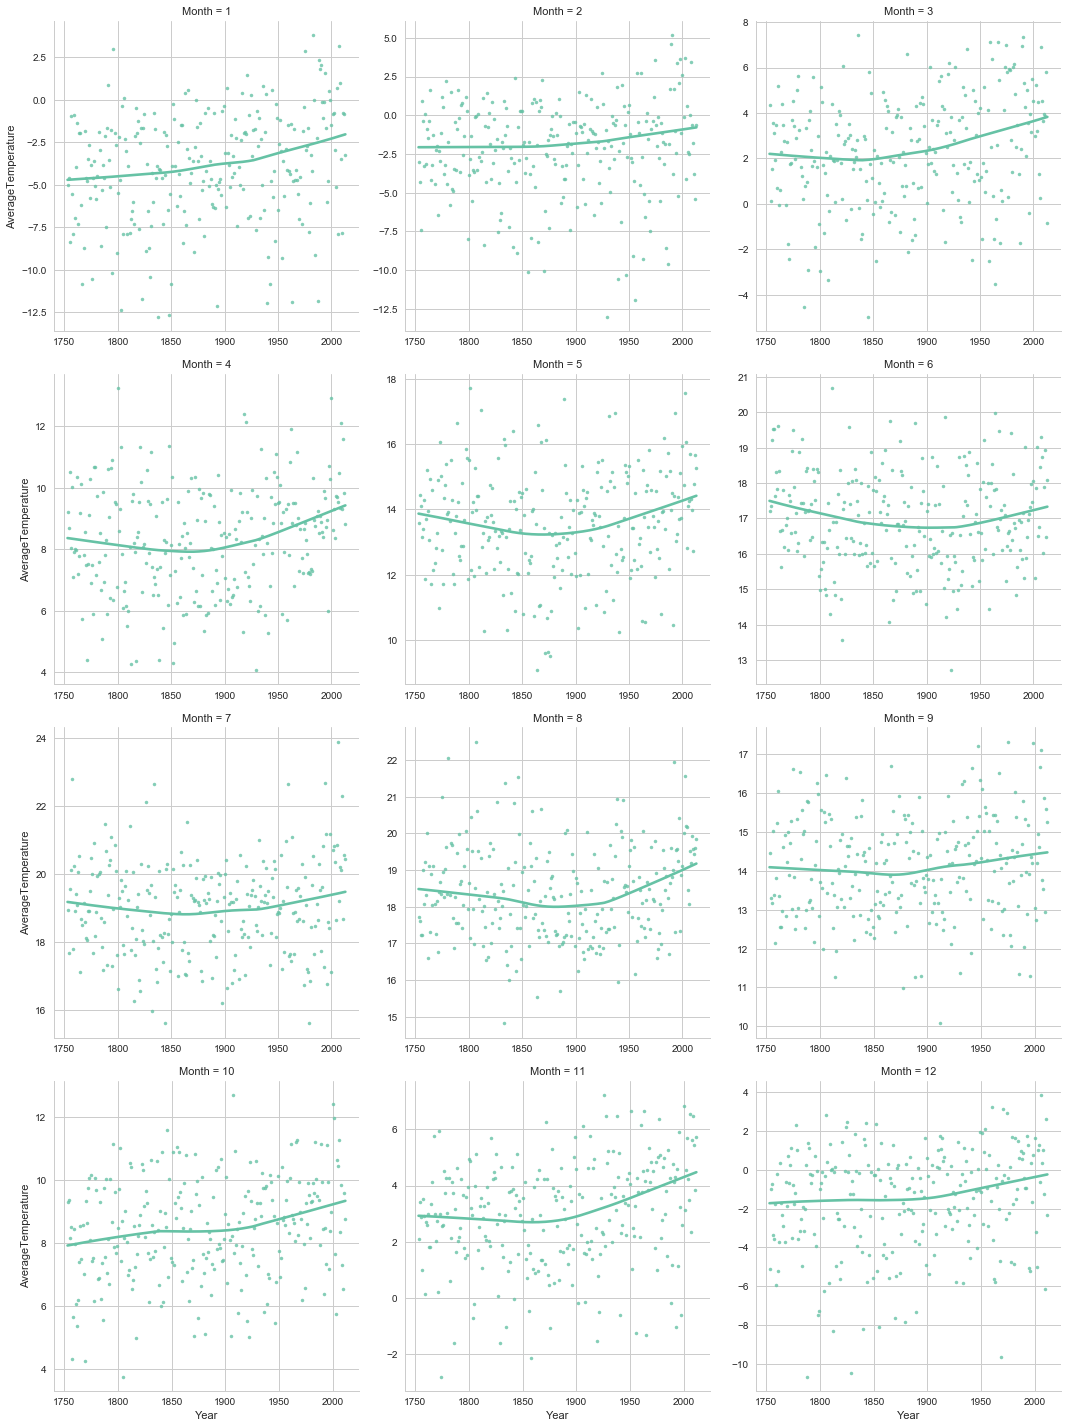

In [8]:
sns.lmplot(y="AverageTemperature", x="Year", data=climate_city, 
           lowess=True, markers=".", col="Month", col_wrap=3, sharex=False, sharey=False)

Poniżej zaś można zobaczyć zakresy temperatur, jakie zdarzały się w całym zbiorze danych przez te nieco ponad 200 lat.

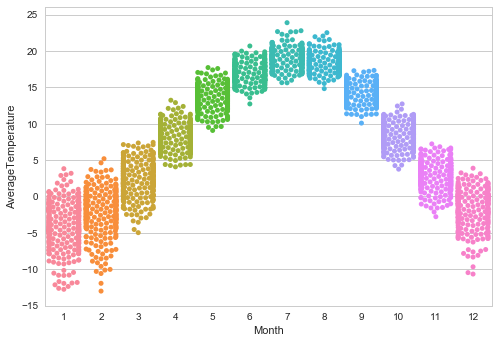

In [9]:
sns.swarmplot(x='Month', y='AverageTemperature', data=climate_city)

Taka prezentacja danych nie mówi jednak wiele o tym, co jest szczególnie istotne w kontekście globalnego ocieplenia, czyli o trendzie. Sprawdźmy jak to wygląda.

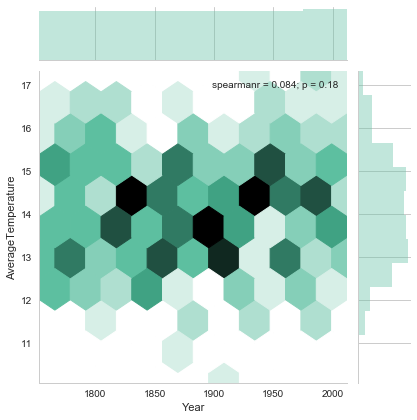

In [10]:
from scipy.stats import spearmanr

sns.jointplot(month_city['Year'], month_city['AverageTemperature'], 
              kind="hex", stat_func=spearmanr)

Co to mówi? Coraz ciemniejsze sześciokąty w górnej części wykresu w miarę upływu czasu wskazują na coraz częstsze odchylenia temperatury w górę.

### Średnie temperatury w jednym miesiącu

Wybrałem jeden miesiąc (taki jak jest teraz) i sprawdziłem, jak często występowała dana temperatura. Sprawdźmy jak to było porównując wszystkie dostępne dane (1753-2013) z okresem po 1970 oraz 1995 roku (niedługo przed El Niño).

Warto zwrócić uwagę, że jeśli miesiącem zdefiniowanym w `MONTH` jest wrzesień, zmiana nie jest duża. Wynika to z tego, że ten akurat miesiąc aż tak bardzo się nie ocieplił na przestrzeni lat (co widać tam, gdzie jest tak dużo wykresów :) ). Polecam zmienić wartość zmiennej `MONTH` i uruchomić dwie komórki poniżej.

In [11]:
before_1970 = month_city[month_city['Year'] < RISE_START_YEAR]['AverageTemperature'].copy()
after_1970 = month_city[month_city['Year'] >= RISE_START_YEAR]['AverageTemperature'].copy()
after_1995 = month_city[month_city['Year'] >= 1995]['AverageTemperature'].copy()

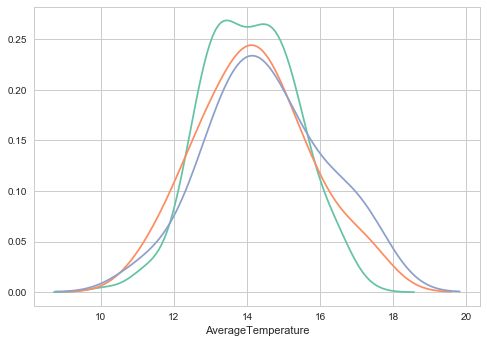

In [12]:
fig, ax = plt.subplots()
sns.distplot(before_1970, hist=False, ax=ax)
sns.distplot(after_1970, hist=False, ax=ax)
sns.distplot(after_1995, hist=False, ax=ax)

W drugim i trzecim przypadku danych oczywiście nie ma zbyt dużo (43 i 19 pomiarów), ale da się zauważyć, że zwiększa się prawdopodobieństwo wystąpienia temperatury w okolicach 19 stopni.

### Kostka klimatyczna

Kostka klimatyczna jest koncepcją, która ma ułatwić zrozumienie tego, że globalne ocieplenie, zwłaszcza w początkowej fazie, nie oznacza, że nie będzie zim w ogóle, a tylko to, że będą one rzadziej.

Załóżmy, że pomalowaliśmy ściany kostki na trzy kolory: czerwony, biały i niebieski oznaczające odpowiednio od wysokich, przez średnie, do niskich temperatur. Dostosujmy te przedziały tak, żeby prawdopodobieństwa były analogiczne do szans, że wypadnie ściana kostki zamalowana danym kolorem.
Globalne ocieplenie sprawia, że dodatkowe ściany kostki zostają zamalowane na czerwono.

W tym notebooku zmieniłem trochę tę koncepcję — zamiast ścian kostki, pokazuję liczbę miesięcy w roku, które uznalibyśmy za ciepłe, normalne lub chłodne (ciepłe jak na styczeń, itd.) Zobaczmy, jak to wygląda.

In [13]:
def label_bin(row):
    if row['AverageTemperature'] < (row['MonthMeanBaseline'] - row['MonthStdBaseline']):
        return 'Low'
    elif row['AverageTemperature'] > (row['MonthMeanBaseline'] + row['MonthStdBaseline']):
        return 'High'
    return 'Medium'

In [14]:
monthly_frames = []
for i, group in climate_city.groupby('Month'):
    g2 = group.copy()
    g_temp_series = g2[(g2['Year'] >= BASE_YEAR_START) & (g2['Year'] <= BASE_YEAR_END)]['AverageTemperature']
    g2['MonthMeanBaseline'] = g_temp_series.mean()
    g2['MonthStdBaseline'] = g_temp_series.std()
    g2['TemperatureBin'] = g2.apply(label_bin, axis=1)
    monthly_frames.append(g2)

In [15]:
all_with_bins = pd.concat(monthly_frames).sort_index()
city_grouped_with_counted_bins = all_with_bins.groupby(['Year','TemperatureBin'])['City'] \
    .agg(['count']).reset_index()

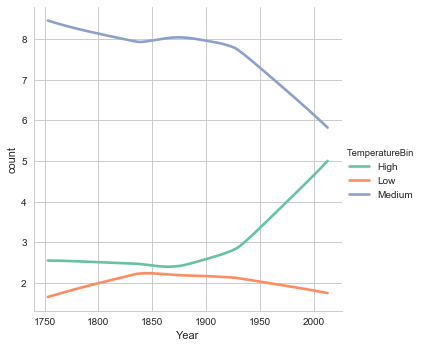

In [16]:
sns.lmplot(x='Year', y='count', hue='TemperatureBin', 
           data=city_grouped_with_counted_bins, 
           scatter=False, lowess=True)

Spadek ilości miesięcy o temperaturze "normalnej" w okresie bazowym (1850-1900) jest aż nadto widoczny. 

### krótkie info o tym, co jest okresem bazowym w badaniu zmian klimatu

Na moje pytanie:

(...) Otóż zrobiłem mała analizę zmian temperatury lądu na podstawie
zbioru danych z Berkeley. Chciałem jednak to pokrótce opisać i nie
mogę doszukać się informacji na temat tego, co paryskie porozumienie
definiuje jako erę pre-industrialną. Znalazłem jedynie coś takiego:
https://www.climate-lab-book.ac.uk/2017/defining-pre-industrial/ 
Państwo pewnie macie tę informację po prostu w głowie, stąd moje
pytanie 🙂 Będę bardzo wdzięczny i dzisiaj podeślę linka 🙂


----------

Niestety, w porozumieniu (przezornie?) nie podano ścisłej definicji tego terminu. Klasycznie uznaje się, że "epoka przedprzemysłowa" oznacza "przed rokiem 1750". Z praktycznych względów - przede wszystkim dostępności danych - punkt odniesienia wykresów czy podawanych wartości jest jednak późniejszy, np. okres przed 1850, 1850-1900, 1801-1900, pierwsze 30 lat danej serii pomiarowej. 

Z jednej strony, pewnie wielu osobom będzie teraz zależało na dokładnym ustaleniu, co ma oznaczać "przedprzemysłowe" (przykładem jest artykuł, który Pan linkuje), żeby móc śledzić, czy już nam te 1,5C stuknęło, czy nie. Z drugiej - nie ma to wielkiego znaczenia o tyle, że 
 
 - na początku ery przemysłowej zmiany globalnej średniej temperatury
   były jeszcze niewielkie, więc to niewielka różnica, jaki okres
   weźmiemy jako referencyjny,
 - progi 1,5 oraz 2C są wyznaczone do pewnego stopnia arbitralnie (jako
   okrągłe liczby, które _powinny_ nam zapewnić, że nie przekroczymy
   _większości_ "tipping points", czy że nie przekroczymy ich z prawdopodobieństwem "większym niż x" 
   http://naukaoklimacie.pl/aktualnosci/ziemskie-progi-bezpieczenstwa-193),
 - nawet jeśli wyhamujemy z emisjami, to przecież nie wstrzelimy się
   równo w 1,5 czy 2C (liczone od dowolnego poziomu odniesienia), możemy
   mieć nadzieję, że na poziomie 2,2C jeszcze nic się wielkiego nie
   stanie, ale jest też pewne prawdpodobieństwo, że już przy 1,8C
   uruchomi się dużo sprzężeń zwrotnych.

Na Pana miejscu przyjęłabym jako punkt odniesienia okres 1850-1900, bo jest on powszechie wykorzystywany w praktyce (np. w podsumowaniu http://naukaoklimacie.pl/aktualnosci/1-5-czy-2-stopnie-co-to-w-ogole-za-roznica-191) i to pewnie projekcje z takim okresem referencyjnym oglądali politycy (np. w raporcie Global Carbon Budget -załączony obrazek). Dla uniknięcia wątpliwości można zaznaczyć, że przyjął go Pan w ślad za innymi i że choć są w tej kwestii pewne rozbieżności to tak w sumie nie robi to wielkiej różnicy (na wykresie http://naukaoklimacie.pl/aktualnosci/ziemskie-progi-bezpieczenstwa-193 widać, jak płaski był wykres przed XIX wiekiem.


----------


Z tego miejsca dziękuję Pani Aleksandrze :)